### Natalidad EDA

Análisis de datos exploratorio por municipio de los nacimientos de 1990-2020, utilizando el archivo: 'data/processed/natalidad_sonora_municipio_tidy_nacimientos_mayorIgual12_tidy.csv'

In [32]:
#Realizando los imports necesarios
!pip install missingno
import pandas as pd
import missingno as msno
import plotly.express as px
import statsmodels.api as sm



In [33]:
#Leyendo los datos
natalidad_data = pd.read_csv('../data/processed/natalidad_sonora_municipio_tidy_nacimientos_mayorIgual12_tidy.csv')
natalidad_data.head()

,cve_municipio,desc_municipio,1990,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Aconchi,NaN,68.0,59.0,75.0,63.0,66.0,86.0,77.0,...,46.0,46.0,37.0,33.0,40.0,43.0,26.0,38.0,34.0,29.0
1,2,Agua Prieta,NaN,1589.0,1665.0,1721.0,1723.0,1801.0,1900.0,1860.0,...,1709.0,1886.0,1769.0,1575.0,1473.0,1400.0,1466.0,1477.0,1492.0,955.0
2,3,Alamos,NaN,674.0,575.0,732.0,579.0,615.0,698.0,633.0,...,613.0,527.0,544.0,473.0,443.0,428.0,391.0,344.0,354.0,291.0
3,4,Altar,NaN,151.0,176.0,172.0,198.0,208.0,212.0,238.0,...,208.0,227.0,233.0,213.0,181.0,165.0,190.0,169.0,171.0,115.0
4,5,Arivechi,NaN,82.0,30.0,23.0,46.0,35.0,22.0,34.0,...,15.0,22.0,17.0,17.0,14.0,19.0,13.0,18.0,16.0,6.0


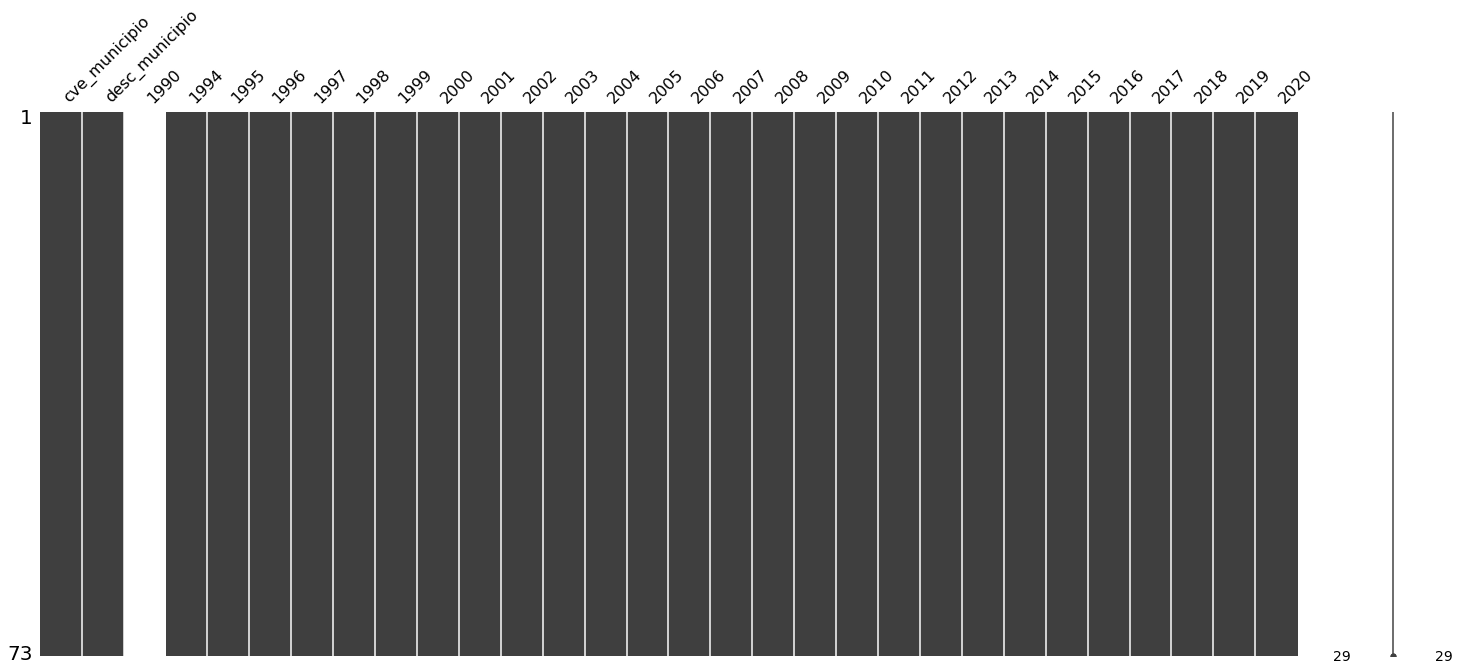

In [34]:
#Viendo datos perdidos 
msno.matrix(natalidad_data);

In [35]:
#Removiendo columnas que no son necesarias
natalidad_data.drop(['cve_municipio', '1990'], axis=1, inplace=True)

In [36]:
#Renombrando columnas
natalidad_data.rename({'desc_municipio':'municipio'}, axis=1, inplace=True)

In [37]:
list(natalidad_data.iloc[:,1:].columns)

['1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [38]:
nacimientos_tidy = pd.melt(natalidad_data, id_vars='municipio', value_vars =list(natalidad_data.iloc[:,1:].columns),var_name='año', value_name='nacimientos')
nacimientos_tidy

,municipio,año,nacimientos
0,Aconchi,1994,68.0
1,Agua Prieta,1994,1589.0
2,Alamos,1994,674.0
3,Altar,1994,151.0
4,Arivechi,1994,82.0
...,...,...,...
1966,Yécora,2020,61.0
1967,General Plutarco Elías Calles,2020,115.0
1968,Benito Juárez,2020,291.0
1969,San Ignacio Río Muerto,2020,212.0


In [39]:
nacimientos_tidy['año'] = nacimientos_tidy['año'].astype('int64') 

In [40]:
#Graficando Serie de tiempo para cada uno de los municipios
fig = px.line(nacimientos_tidy, x="año", y='nacimientos',color='municipio',
              title='Nacimientos en los municipios de Sonora',
              labels={'municipio':'Municipio',
                      'año':'Año'},
                template='ggplot2')

fig.show()

In [41]:
dff = nacimientos_tidy.groupby('año')['nacimientos'].sum()
fig = px.bar(dff, x=dff.index, y=dff.values, 
             labels={'y': 'Nacimientos',
                     'año':'Año'},
             title='Nacimientos totales en Sonora',
             template='ggplot2')
fig.show()


In [42]:
fig = px.bar(nacimientos_tidy, x="año", y='nacimientos',color='municipio',
              title='Nacimientos en los municipios de Hermosillo',
              labels={'municipio':'Municipio',
                      'año':'Año'},
                template='ggplot2')

fig.show()

In [43]:
dff = nacimientos_tidy[nacimientos_tidy['municipio'] == 'Hermosillo']
fig = px.scatter(dff, x="año", y="nacimientos", trendline="ols",
                title='Nacimientos en Hermosillo',
                labels={'municipio':'Municipio',
                      'año':'Año'},
                template='ggplot2')
fig.show()

In [44]:
tendencias = pd.DataFrame()
#Obteniendo la tendencia para cada municipio
for municipio in nacimientos_tidy['municipio'].unique():
    dff = nacimientos_tidy[nacimientos_tidy['municipio'] == municipio]
    X = dff[['año']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
    Y = dff['nacimientos']
    X = sm.add_constant(X) # adding a constant

    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X) 

    df = pd.DataFrame({"municipio":[municipio],
                    "tendencia":[model.params[1]]})
    tendencias = pd.concat([tendencias, df])

In [45]:
tendencias

,municipio,tendencia
0,Aconchi,-1.741758
0,Agua Prieta,-15.336996
0,Alamos,-12.514042
0,Altar,-1.006105
0,Arivechi,-1.212454
...,...,...
0,Yécora,-3.632479
0,General Plutarco Elías Calles,-3.808303
0,Benito Juárez,7.216728
0,San Ignacio Río Muerto,4.863858


In [47]:
dff = nacimientos_tidy[nacimientos_tidy['municipio'] == 'Benito Juárez']
fig = px.scatter(dff, x="año", y="nacimientos", trendline="ols",
                title='Nacimientos en Benito Juarez',
                labels={'municipio':'Municipio',
                      'año':'Año'},
                template='ggplot2')
fig.show()